In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

C:\Users\skyhong\AppData\Local\Temp\ipykernel_18692\2990391754.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
from graphplotlib import *

def code_to_name(code):
    code = int(code)
    if code == 1:
        return "L1"
    elif code == 21:
        return "SGL"
    else:
        return "None"
    
def filter_data(data, *keys): # keys = [column, value]
    data = data.copy()
    for key in keys:
        if key[1][0] == '~':
            data = data[data[key[0]] != key[1][1:]]
            
        else:
            data = data[data[key[0]] == key[1]]
    return data

(1, 15)


,model_id,cv_idx,input,hidden,lambda,train_2,rnn_layers,dnn_layers,f1_1,precision_1,recall_1,training_time,test_loss,accuracy,regularizer
0,1,2.0,None,None,0e+00,498.0,5.0,3.0,28.322,29.786,27.442,6.8262,0.35122,94.892,"(None,None)"


(26, 15)


,model_id,cv_idx,input,hidden,lambda,train_2,rnn_layers,dnn_layers,f1_1,precision_1,recall_1,training_time,test_loss,accuracy,regularizer
1,2,2.0,SGL,None,1e-03,498.0,5.0,3.0,12.476,16.872,9.998,145.1884,0.569917,94.728,"(SGL,None)"
2,3,2.0,SGL,SGL,1e-03,498.0,5.0,3.0,4.314,2.238,60.000,21.9834,0.724752,40.746,"(SGL,SGL)"
3,4,2.0,L1,None,1e-03,498.0,5.0,3.0,20.542,22.492,19.070,65.8448,0.484889,94.562,"(L1,None)"
4,5,2.0,L1,L1,1e-03,498.0,5.0,3.0,10.926,7.734,68.604,15.1434,0.636073,39.254,"(L1,L1)"
5,6,2.0,SGL,None,1e-04,498.0,5.0,3.0,21.920,23.504,20.930,12.6094,0.493676,94.502,"(SGL,None)"


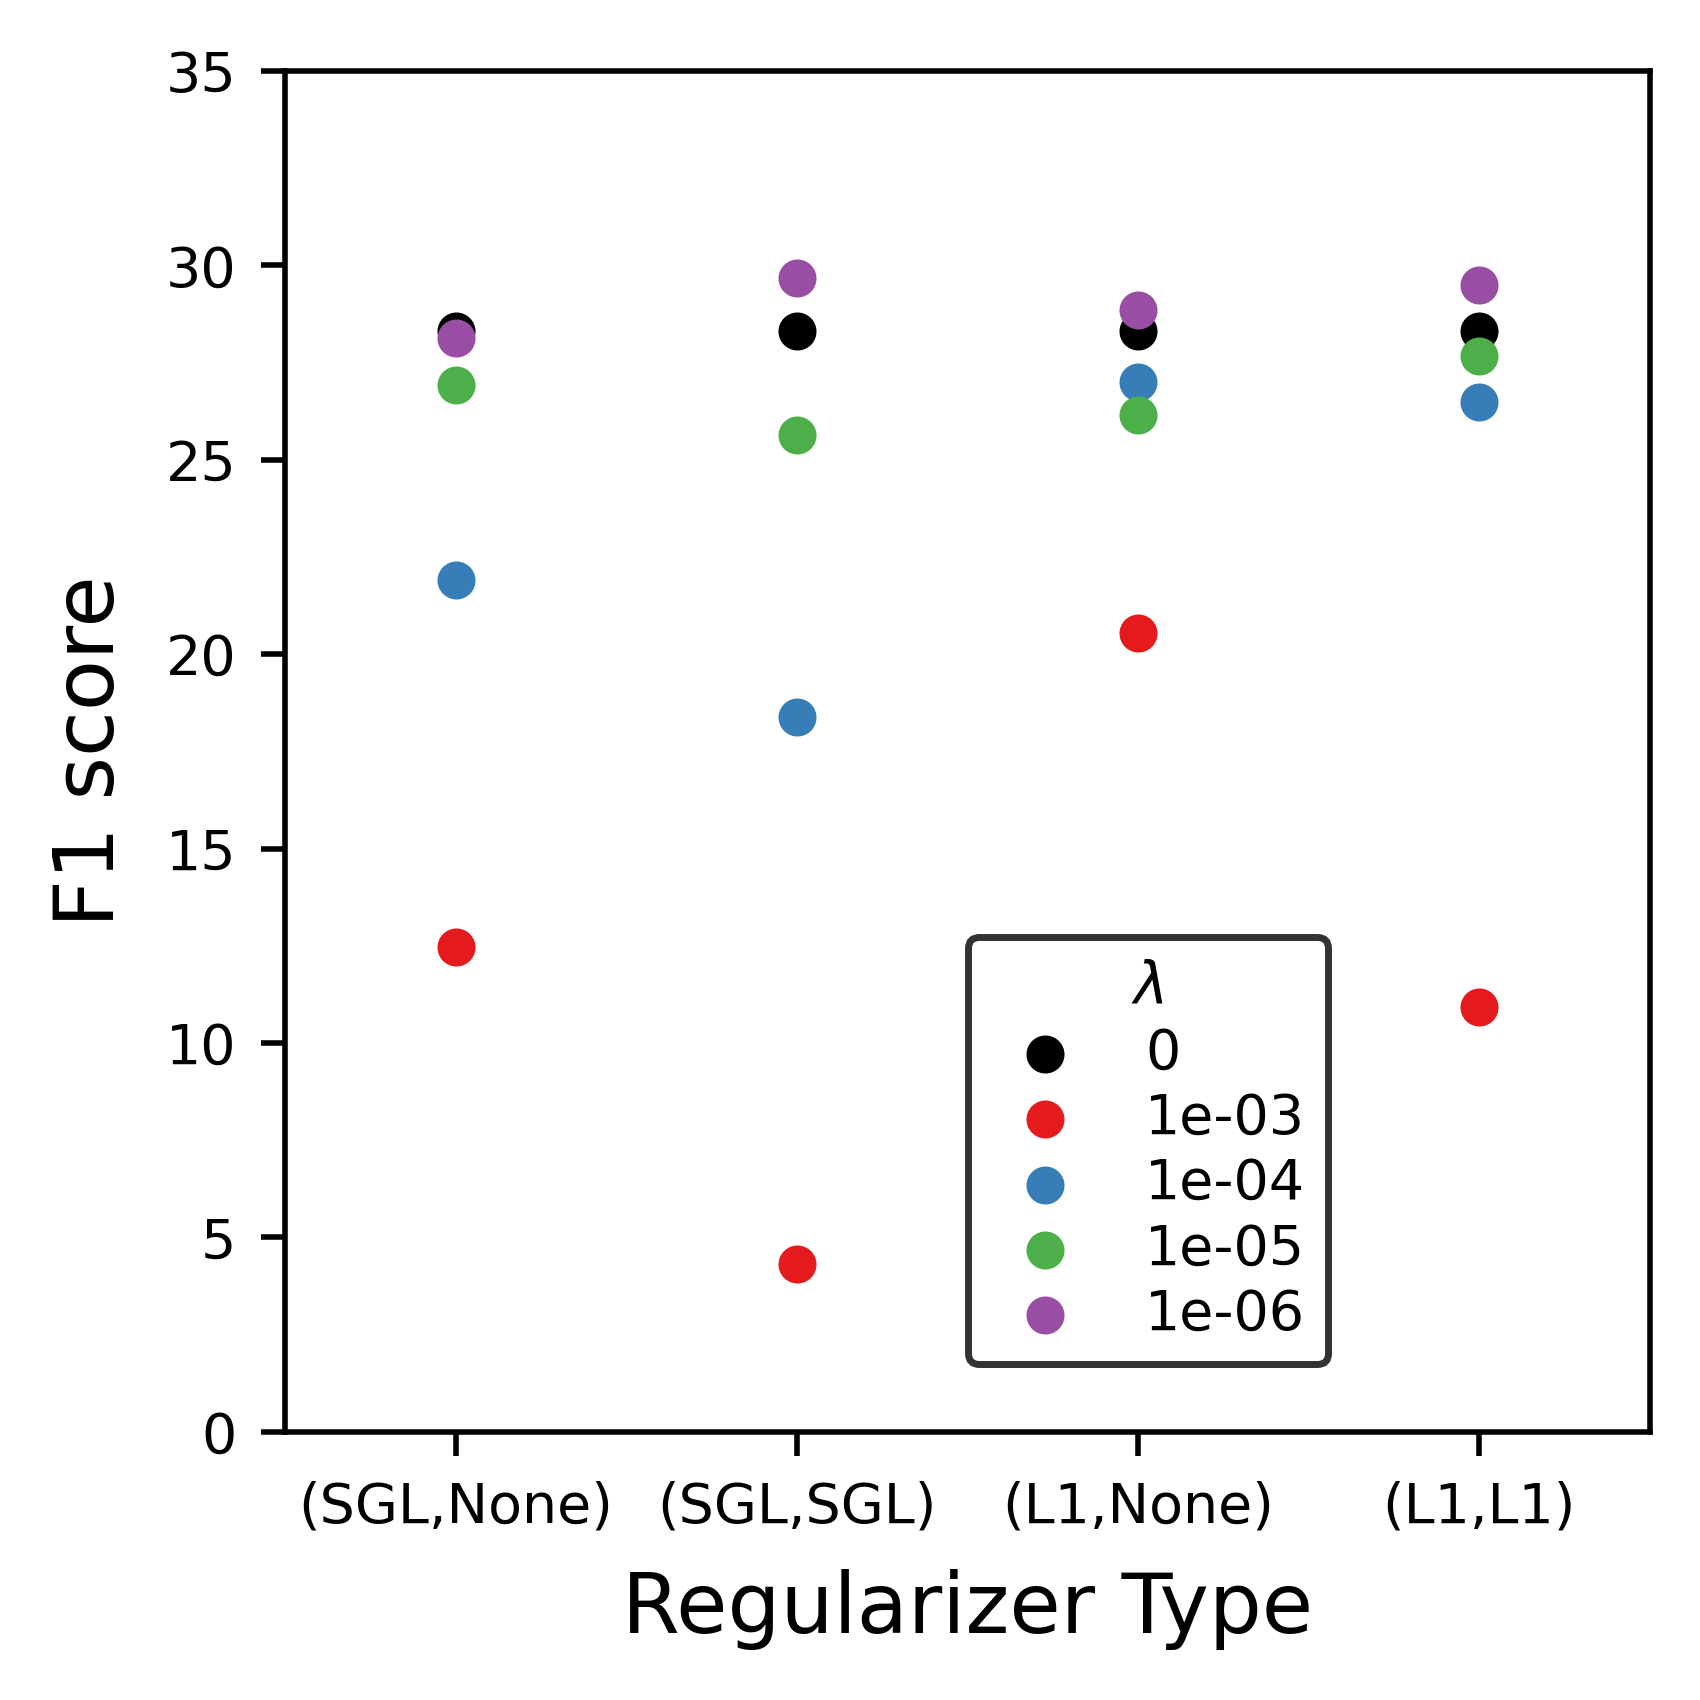

In [3]:
data = pd.read_csv('./figures/lambda and regularizer mean.csv')
data['lambda'] = data['lambda'].apply(lambda x : f'{x:.0e}')
data['input'] = data['input'].apply(code_to_name)
data['hidden'] = data['hidden'].apply(code_to_name)
data['regularizer'] = data.apply(lambda x: f"({x['input']},{x['hidden']})", axis=1)

### Base data ###
base_data = filter_data(data, 
                        ('regularizer', '(None,None)')
)
base_score = base_data.f1_1.values
print(base_data.shape)
display(base_data.head(5))

### Main Data ###
main_data = filter_data(data, 
                        ('regularizer', '~(None,None)'),
)
print(main_data.shape)
display(main_data.head(5))

### Figure Config ###
plt.figure(figsize=(3.5, 3.5), facecolor = 'white', dpi=500)
title  = 'Effect of lambda on F1 score'
xlabel, xkey = 'Regularizer Type', 'regularizer'
xitems = ['(SGL,None)', '(SGL,SGL)', '(L1,None)', '(L1,L1)']
y, ylabel = 'f1_1', 'F1 score'

xlim = (0.5, len(xitems) + 0.5)
# xmin = main_data[x].min()
# xmax = main_data[x].max()
# xlim = (xmin * 0.95, xmax * 1.05)

ylim = (0, 35)
# ymin = main_data[y].min()
# ymax = main_data[y].max()
# ylim = (ymin * 0.95, ymax * 1.05)

### Plot Data ###
huekey = 'lambda'
hueitems = ['1e-03', '1e-04', '1e-05', '1e-06']

xticks = range(1, len(xitems) + 1)
plt.scatter(xticks, [base_score for _ in range(len(xticks))], 
            s=20, color = 'k', label = '0')
for h, hue in enumerate(hueitems):
    hue_data = main_data[main_data[huekey] == hue]
    scatergoryplot(data=hue_data, xticks=xticks, xkey=xkey, xitems=xitems, y=y, label=hue,
                   color=sns.color_palette('Set1')[h])
        
### Set Axis and Legend ###
setaxis(xlabel=xlabel, ylabel=ylabel, 
        # title=title,
        xlim=xlim, ylim=ylim,
        xticks=xticks, xtickslabels=xitems)
setlegend(loc=(0.5,0.05), title = '$\lambda$')
# setgrid()

### Show and Save ###
plt.tight_layout()
plt.savefig(f'./figures/figure_{title} (supple).png')
plt.show()

In [4]:
for weights, name in zip(weights_list, name_list):
    plt.figure(figsize=(3.5,3.5), dpi = 500, facecolor = 'white')

    text_size = 8
    tick_size = 8
    axis_size = 12
    label_size = 6

    # Plotting points
    point_size = 20
    alpha = 1
    num = 0
    width = 0.5
    alpha = 0.8
    # color = 'k'
    
    ratio = 0.1
    selected_features = list(weights.sort_values(by = 'weights', ascending = False).iloc[ : int(len(weights) * ratio)].index)
    t = 0
    for idx, x in enumerate(weights.index):
        if x in selected_features:
            if not t:
                plt.bar(idx, weights.weights[x], 
                        align='center', label = f'Top 10%', color='b', alpha=alpha, width=width)
                t += 1
            else:
                plt.bar(idx, weights.weights[x], 
                        align='center', color='b', alpha=alpha, width=width)
            
        else:
            plt.bar(idx, weights.weights[x], 
                    align='center', color='k', alpha=alpha, width=width)
                
        
        # last_num = num
        # num += num_d
        # plt.bar(range(last_num, num), weights.values.squeeze()[last_num:num], align='center', label = f'N({5*i}A)', color=color, alpha=alpha, width=width)
        
        # last_num = num
        # num += sasa_d
        # plt.bar(range(last_num, num), weights.values.squeeze()[last_num:num], align='center', label = f'SASA({5*i}A)', color=color, alpha=alpha, width=width)


    # Axis labels
    labelpad = 5
    plt.ylabel('Input weight', fontsize=axis_size, labelpad = labelpad)
    plt.yticks(fontsize=tick_size)
    x_max = 498
    y_loc = 0.85
    x_loc = 0.99
    alignment = 'right'
    if name == 'input_None_hidden_None':
        y_max = 0.08
        plt.ylim(0, y_max)
        plt.title(f"Weight regularization: Input = {name.split('_')[1]}, Hidden = {name.split('_')[3]}")
        plt.text(x_max*x_loc, y_max*y_loc, f"$\lambda$ = 0",
                 horizontalalignment=alignment, verticalalignment='center')
        plt.yticks([x for x in np.linspace(0, y_max, 5, endpoint=True)])
    else:
        y_max = 0.02
        plt.ylim(0, y_max)
        plt.title(f"Weight regularization: Input = {name.split('_')[1]}, Hidden = {name.split('_')[4]}")
        plt.text(x_max*x_loc, y_max*y_loc, f"$\lambda$ = {name.split('_')[2]}",
                 horizontalalignment=alignment, verticalalignment='center')
        plt.yticks([x for x in np.linspace(0, y_max, 5, endpoint=True)])

    plt.xlabel('Feature number', fontsize=axis_size, labelpad = labelpad)
    plt.xticks(
        # [(i + 1)//2 * 37 + (i + 0)//2 * 46 for i in range (13)], 
        [i * 83 for i in range (7)], 
        # labels = , 
        fontsize=tick_size)
    plt.xlim(-5, len(weights) + 5)

    # 
    # [''] + [f'num\n({5*(x//2)}A)' if x % 2 == 0 else f'SASA\n({5*(x//2)}A)' for x in range(0, 12)]

    # Legend
    plt.legend(borderpad = 0.4, labelspacing = 0.3, fontsize=text_size, edgecolor = '0', facecolor = '1')
    plt.grid(True, which='major', axis='both', color = 'gray', linestyle = '--', linewidth = 0.03, zorder = 0)
    plt.tight_layout()

    plt.savefig(f'./figures/figure_input_weights_{name}.png')
    plt.show()



NameError: name 'weights_list' is not defined

3


number_thr_0A                                      4
number_A_polar_uncharged_with_hydroxyl_group_0A    4
number_gly_0A                                      4
dtype: int64

<AxesSubplot:>

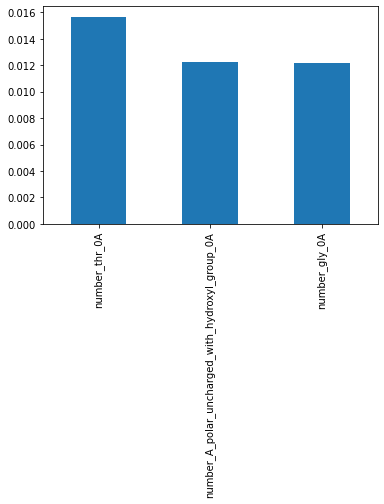

In [ ]:
ratio = 0.05
min_score = 4
weights_regularizer = weights_list[1:]

top_weights = pd.concat([weights.sort_values(by = 'weights', ascending = False)[:int(len(weights)*ratio)] for weights in weights_regularizer], axis=1)    
weight_scores = (top_weights > 0).sum(axis=1).sort_values(ascending=False)
print(len(weight_scores[weight_scores >= min_score]))
display(weight_scores[weight_scores >= min_score])

best_features = weight_scores[weight_scores >= min_score].index
pd.concat([weights.loc[best_features] for weights in weights_list], axis=1).mean(1).sort_values(ascending=False).plot(kind='bar')
